In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib import style
style.use('ggplot')
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv('IMDB Dataset.csv')

In [6]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [7]:
df.shape

(50000, 2)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


Text(0.5, 1.0, 'Sentiment Distribution')

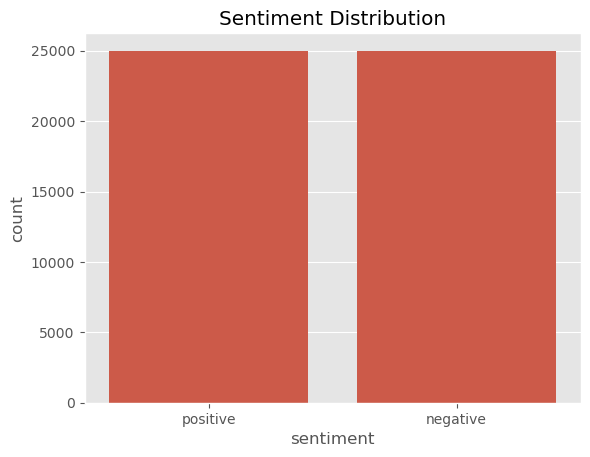

In [9]:
sns.countplot(x='sentiment',data=df)
plt.title("Sentiment Distribution")

In [10]:
for i in range(5):
    print("Review: ", [i])
    print(df['review'].iloc[i], "\n")
    print("Sentiment: ",df['sentiment'].iloc[i], "\n\n")

Review:  [0]
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is d

In [11]:
def no_of_words(text):
    words = text.split()
    word_count = len(words)
    return word_count

In [12]:
df['word count'] = df['review'].apply(no_of_words)

In [13]:
df.head()

,review,sentiment,word count
0,One of the other reviewers has mentioned that ...,positive,307
1,A wonderful little production. <br /><br />The...,positive,162
2,I thought this was a wonderful way to spend ti...,positive,166
3,Basically there's a family where a little boy ...,negative,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230


Text(0.5, 0.98, 'Number of Words in Review')

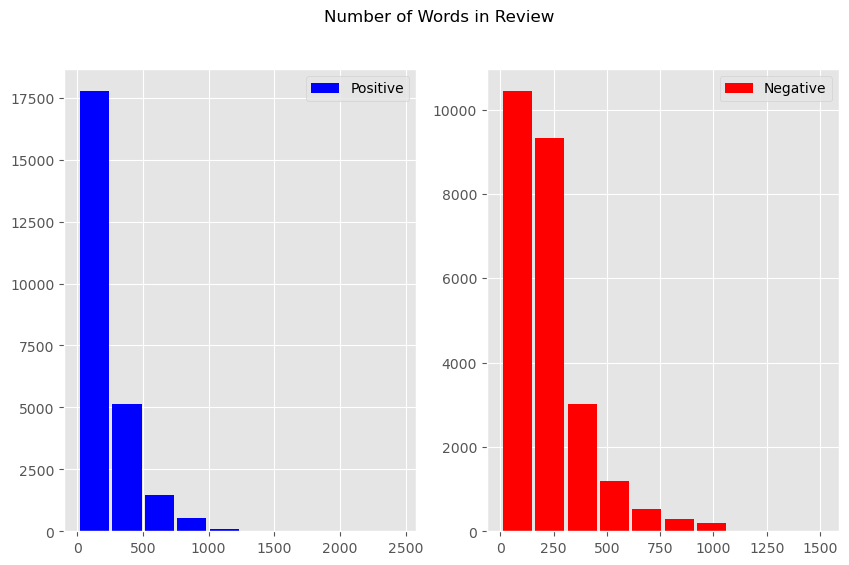

In [14]:
fig, ax = plt.subplots(1,2, figsize = (10,6))
ax[0].hist(df[df['sentiment'] == 'positive']['word count'], label = 'Positive', color='blue', rwidth=0.9);
ax[0].legend(loc='upper right');
ax[1].hist(df[df['sentiment'] == 'negative']['word count'], label = 'Negative', color='red', rwidth=0.9);
ax[1].legend(loc='upper right');
fig.suptitle("Number of Words in Review")

In [18]:
df.sentiment.replace("positive",1,inplace=True)
df.sentiment.replace("negative",0,inplace=True)

In [19]:
df.head()

,review,sentiment,word count
0,One of the other reviewers has mentioned that ...,1,307
1,A wonderful little production. <br /><br />The...,1,162
2,I thought this was a wonderful way to spend ti...,1,166
3,Basically there's a family where a little boy ...,0,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,230


In [37]:
def data_processing(text):
    text = text.lower()
    text = re.sub('<br />','',text)
    text = re.sub(r'https\S+|http\S+|www\S+','',text,flags = re.MULTILINE)
    text = re.sub(r'\@\w+|\#','',text)
    text = re.sub(r'[^\w\s]','',text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [38]:
df.review = df['review'].apply(data_processing)

In [40]:
duplicated_count = df.duplicated().sum()
print("Number of duplicated entries: ", duplicated_count)

Number of duplicated entries:  421


In [41]:
df = df.drop_duplicates('review')

In [42]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [43]:
df.review = df['review'].apply(stemming)

/tmp/ipykernel_284/1414651603.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.review = df['review'].apply(stemming)


In [46]:
df['word count'] = df['review'].apply(no_of_words)

/tmp/ipykernel_284/2135123054.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['word count'] = df['review'].apply(no_of_words)


In [51]:
df.head()

,review,sentiment,word count
0,one reviewers mentioned watching 1 oz episode ...,1,168
1,wonderful little production filming technique ...,1,84
2,thought wonderful way spend time hot summer we...,1,86
3,basically theres family little boy jake thinks...,0,67
4,petter matteis love time money visually stunni...,1,125


In [52]:
pos_reviews = df[df.sentiment == 1]
pos_reviews.head()

,review,sentiment,word count
0,one reviewers mentioned watching 1 oz episode ...,1,168
1,wonderful little production filming technique ...,1,84
2,thought wonderful way spend time hot summer we...,1,86
4,petter matteis love time money visually stunni...,1,125
5,probably alltime favorite movie story selfless...,1,58


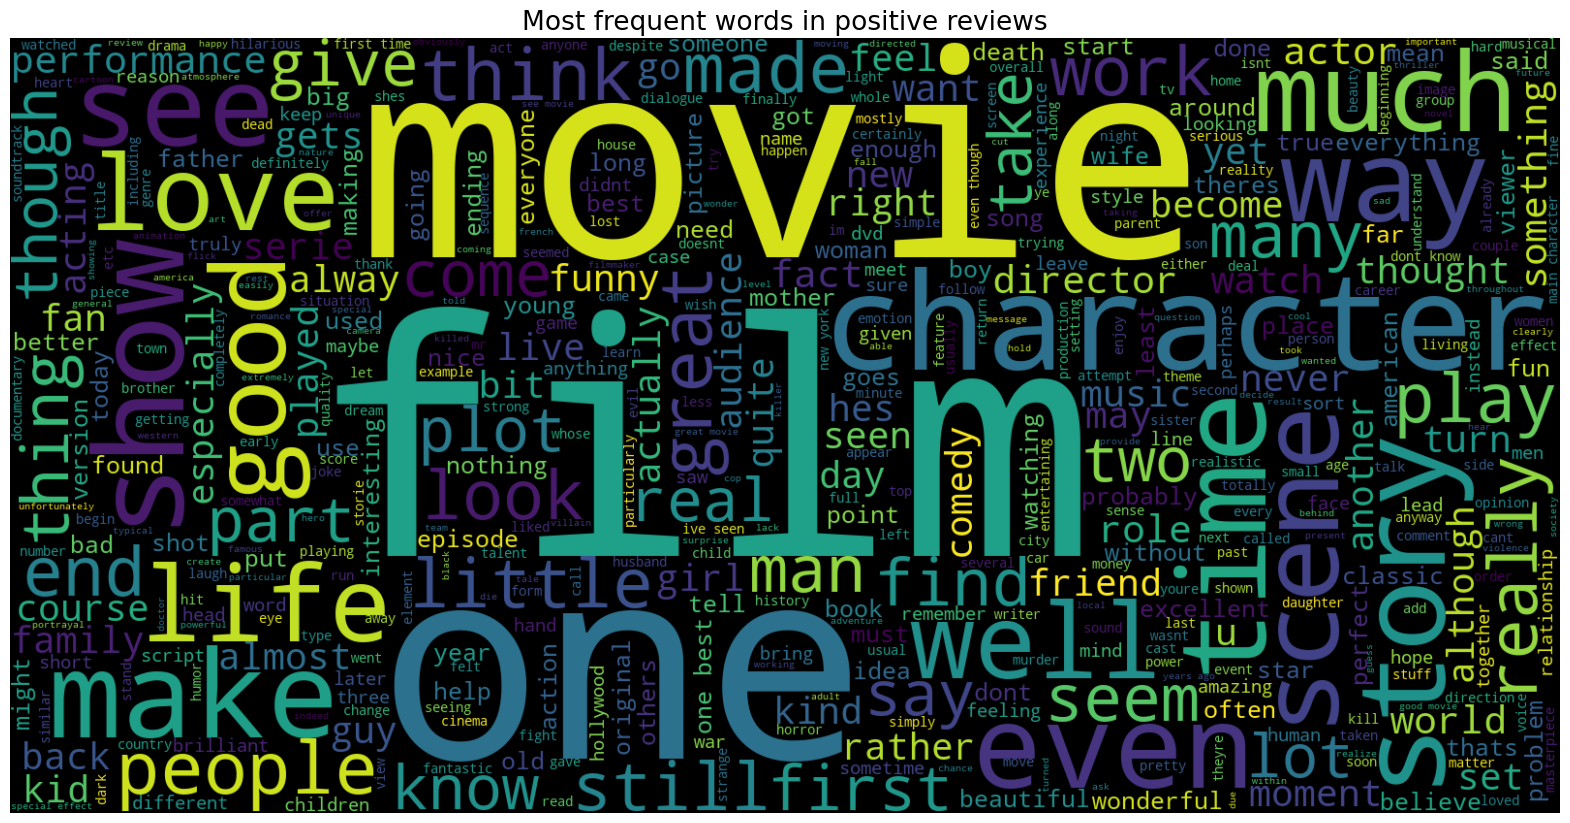

In [54]:
text = ' '.join([word for word in pos_reviews['review']])
plt.figure(figsize = (20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width = 1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in positive reviews', fontsize = 19)
plt.show()

In [56]:
from collections import Counter
count = Counter()
for text in pos_reviews['review'].values:
    for word in text.split():
        count[word] += 1
count.most_common(15)

[('film', 39285),
 ('movie', 35830),
 ('one', 25621),
 ('like', 16998),
 ('good', 14281),
 ('great', 12568),
 ('story', 12338),
 ('see', 11814),
 ('time', 11724),
 ('well', 10930),
 ('really', 10638),
 ('also', 10516),
 ('would', 10320),
 ('even', 9318),
 ('much', 8971)]

In [60]:
pos_words = pd.DataFrame(count.most_common(15))
pos_words.columns = ['word','count']
pos_words.head()

,word,count
0,film,39285
1,movie,35830
2,one,25621
3,like,16998
4,good,14281


Text(0.5, 1.0, 'Common words with postive reviews')

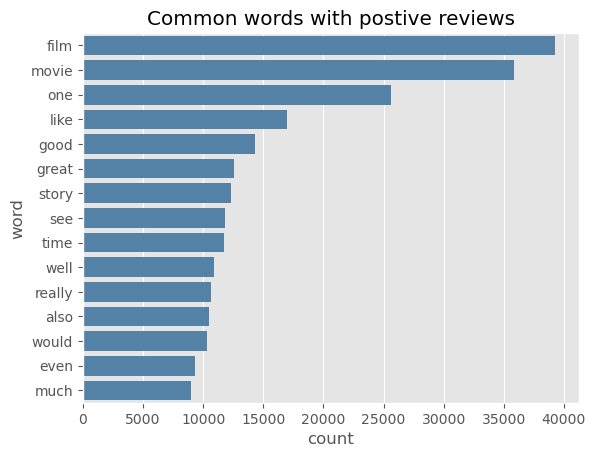

In [69]:
sns.barplot(data=pos_words, x='count', y='word',  color = 'steelblue')
plt.title('Common words with postive reviews')

In [70]:
neg_reviews = df[df.sentiment == 0]
neg_reviews.head()

,review,sentiment,word count
3,basically theres family little boy jake thinks...,0,67
7,show amazing fresh innovative idea 70s first a...,0,83
8,encouraged positive comments film looking forw...,0,64
10,phil alien one quirky films humour based aroun...,0,51
11,saw movie 12 came recall scariest scene big bi...,0,84


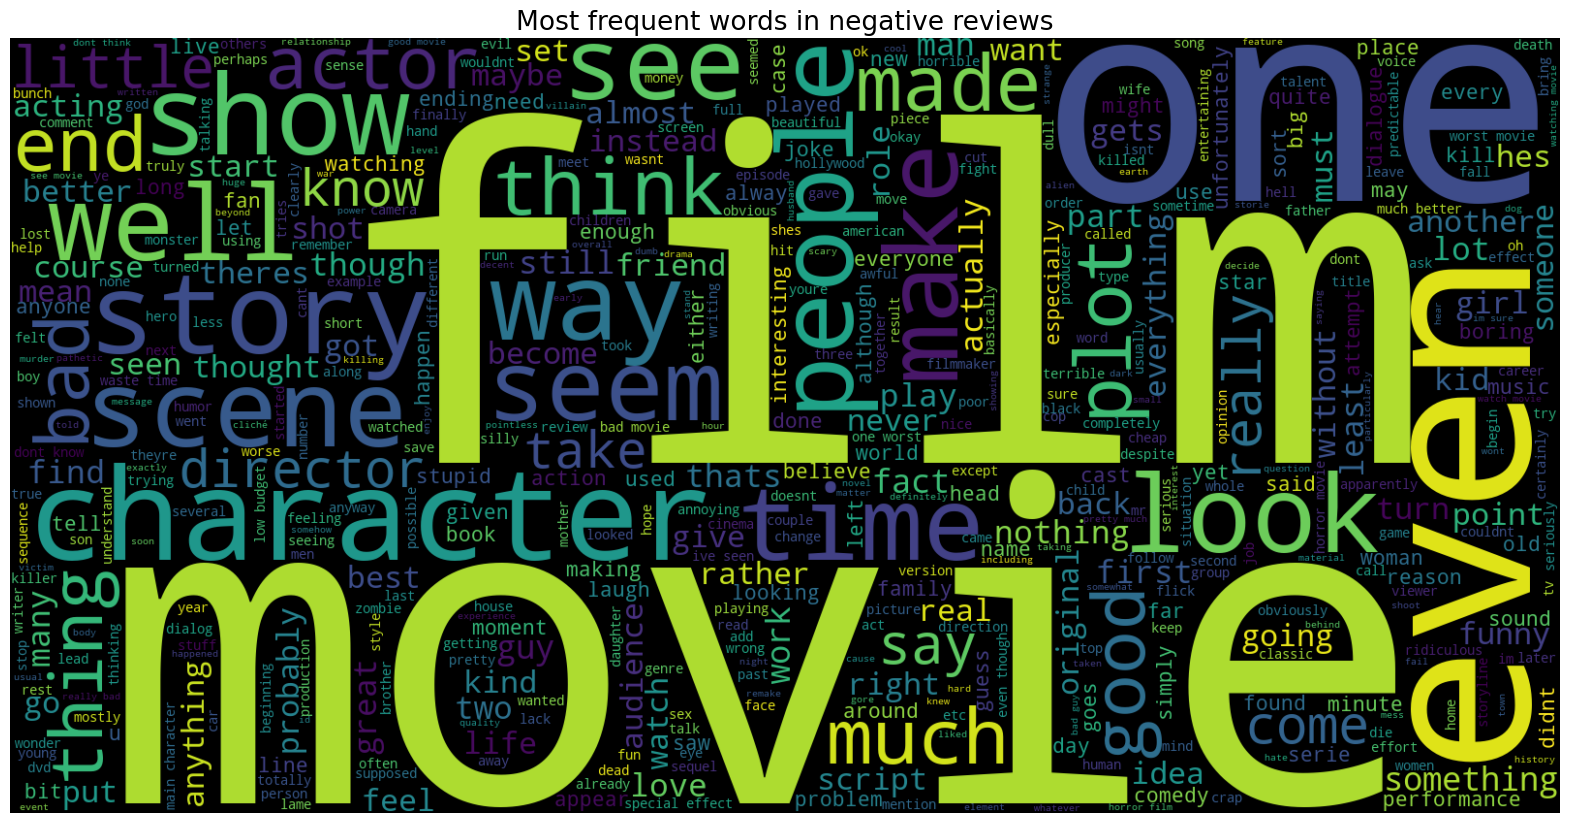

In [71]:
text = ' '.join([word for word in neg_reviews['review']])
plt.figure(figsize = (20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width = 1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in negative reviews', fontsize = 19)
plt.show()

In [72]:
count = Counter()
for text in neg_reviews['review'].values:
    for word in text.split():
        count[word] += 1
count.most_common(15)

[('movie', 47001),
 ('film', 34651),
 ('one', 24361),
 ('like', 21508),
 ('even', 14759),
 ('good', 13995),
 ('bad', 13903),
 ('would', 13482),
 ('really', 12084),
 ('time', 11349),
 ('see', 10412),
 ('dont', 9912),
 ('get', 9884),
 ('much', 9758),
 ('story', 9563)]

In [73]:
neg_words = pd.DataFrame(count.most_common(15))
neg_words.columns = ['word','count']
neg_words.head()

,word,count
0,movie,47001
1,film,34651
2,one,24361
3,like,21508
4,even,14759


Text(0.5, 1.0, 'Common words with negative reviews')

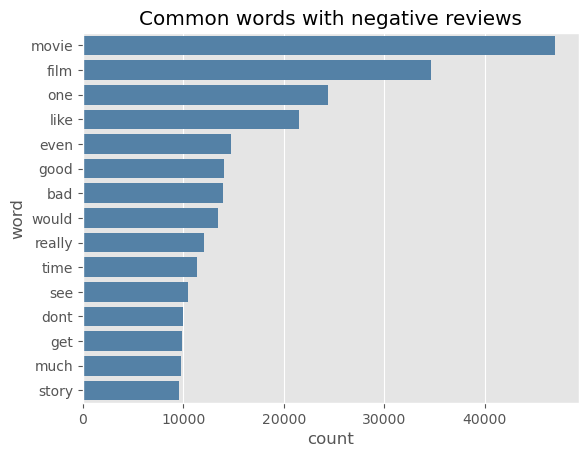

In [75]:
sns.barplot(data=neg_words, x='count', y='word',  color = 'steelblue')
plt.title('Common words with negative reviews')

In [76]:
X = df['review']
y = df['sentiment']

In [77]:
vect = TfidfVectorizer()

In [78]:
X = vect.fit_transform(df['review'])

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [80]:
print("Size of X_train: ", (X_train.shape))
print("Size of y_train: ", (y_train.shape))
print("Size of X_test: ", (X_test.shape))
print("Size of y_test: ", (y_test.shape))

Size of X_train:  (34704, 221700)
Size of y_train:  (34704,)
Size of X_test:  (14874, 221700)
Size of y_test:  (14874,)


In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [83]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
logreg_pred = logreg.predict(X_test)
logreg_acc = accuracy_score(logreg_pred,y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 89.00%


In [84]:
print(confusion_matrix(y_test,logreg_pred))
print("\n")
print(classification_report(y_test,logreg_pred))

[[6453  908]
 [ 728 6785]]


              precision    recall  f1-score   support

           0       0.90      0.88      0.89      7361
           1       0.88      0.90      0.89      7513

    accuracy                           0.89     14874
   macro avg       0.89      0.89      0.89     14874
weighted avg       0.89      0.89      0.89     14874



In [87]:
mnb = MultinomialNB()
mnb.fit(X_train,y_train)
mnb_pred = mnb.predict(X_test)
mnb_acc = accuracy_score(mnb_pred,y_test)
print("Test accuracy: {:.2f}%".format(mnb_acc*100))

Test accuracy: 86.43%


In [88]:
print(confusion_matrix(y_test,mnb_pred))
print("\n")
print(classification_report(y_test,mnb_pred))

[[6418  943]
 [1076 6437]]


              precision    recall  f1-score   support

           0       0.86      0.87      0.86      7361
           1       0.87      0.86      0.86      7513

    accuracy                           0.86     14874
   macro avg       0.86      0.86      0.86     14874
weighted avg       0.86      0.86      0.86     14874



In [89]:
svc = LinearSVC()
svc.fit(X_train,y_train)
svc_pred = svc.predict(X_test)
svc_acc = accuracy_score(svc_pred,y_test)
print("Test accuracy: {:.2f}%".format(svc_acc*100))

Test accuracy: 89.23%


In [90]:
print(confusion_matrix(y_test,svc_pred))
print("\n")
print(classification_report(y_test,svc_pred))

[[6505  856]
 [ 746 6767]]


              precision    recall  f1-score   support

           0       0.90      0.88      0.89      7361
           1       0.89      0.90      0.89      7513

    accuracy                           0.89     14874
   macro avg       0.89      0.89      0.89     14874
weighted avg       0.89      0.89      0.89     14874



In [93]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1,1,10,100], 'loss':['hinge','squared_hinge']}
grid = GridSearchCV(svc, param_grid, refit = True, verbose = 3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END .................C=0.1, loss=hinge;, score=0.872 total time=   0.3s
[CV 2/5] END .................C=0.1, loss=hinge;, score=0.875 total time=   0.2s
[CV 3/5] END .................C=0.1, loss=hinge;, score=0.871 total time=   0.2s
[CV 4/5] END .................C=0.1, loss=hinge;, score=0.878 total time=   0.3s
[CV 5/5] END .................C=0.1, loss=hinge;, score=0.874 total time=   0.3s
[CV 1/5] END .........C=0.1, loss=squared_hinge;, score=0.892 total time=   0.4s
[CV 2/5] END .........C=0.1, loss=squared_hinge;, score=0.895 total time=   0.4s
[CV 3/5] END .........C=0.1, loss=squared_hinge;, score=0.888 total time=   0.4s
[CV 4/5] END .........C=0.1, loss=squared_hinge;, score=0.894 total time=   0.4s
[CV 5/5] END .........C=0.1, loss=squared_hinge;, score=0.890 total time=   0.4s
[CV 1/5] END ...................C=1, loss=hinge;, score=0.896 total time=   0.7s
[CV 2/5] END ...................C=1, loss=hinge;,

GridSearchCV(estimator=LinearSVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'loss': ['hinge', 'squared_hinge']},
             verbose=3)

In [94]:
print("best cross validation score: {:.2f}".format(grid.best_score_))
print("best parameters: ",grid.best_params_)

best cross validation score: 0.89
best parameters:  {'C': 1, 'loss': 'hinge'}


In [95]:
svc = LinearSVC(C = 1, loss = 'hinge')
svc.fit(X_train,y_train)
svc_pred = svc.predict(X_test)
svc_acc = accuracy_score(svc_pred,y_test)
print("Test accuracy: {:.2f}%".format(svc_acc*100))

Test accuracy: 89.40%


In [96]:
print(confusion_matrix(y_test,svc_pred))
print("\n")
print(classification_report(y_test,svc_pred))

[[6510  851]
 [ 725 6788]]


              precision    recall  f1-score   support

           0       0.90      0.88      0.89      7361
           1       0.89      0.90      0.90      7513

    accuracy                           0.89     14874
   macro avg       0.89      0.89      0.89     14874
weighted avg       0.89      0.89      0.89     14874

